Data Preprocessing- cleaning of data

In [54]:
import pandas as pd
filepath='/content/World-Stock-Prices-Dataset.csv'
df=pd.read_csv(filepath)
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Capital Gains
0,2024-10-22 00:00:00-04:00,5.658000,5.885000,5.315000,5.650000,18612600.0,0.0,0.0,peloton,PTON,fitness,usa,NaN
1,2024-10-22 00:00:00-04:00,169.580002,170.300003,169.289993,169.929993,390900.0,0.0,0.0,toyota,TM,automotive,japan,NaN
2,2024-10-22 00:00:00-04:00,118.919998,119.379997,118.599998,118.930000,31200.0,0.0,0.0,adidas,ADDYY,apparel,germany,NaN
3,2024-10-22 00:00:00-04:00,270.619995,272.829987,268.579987,272.399994,2594700.0,0.0,0.0,american express,AXP,finance,usa,NaN
4,2024-10-22 00:00:00-04:00,42.888000,42.888000,42.888000,42.888000,0.0,0.0,0.0,puma,PMMAF,apparel,germany,NaN


In [55]:
df = df.drop(columns=['Capital Gains'])

Dealing with missing value to make the dataset consistent


In [56]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Brand_Name      0
Ticker          0
Industry_Tag    0
Country         0
dtype: int64


Ploting all the brands in an industry domain

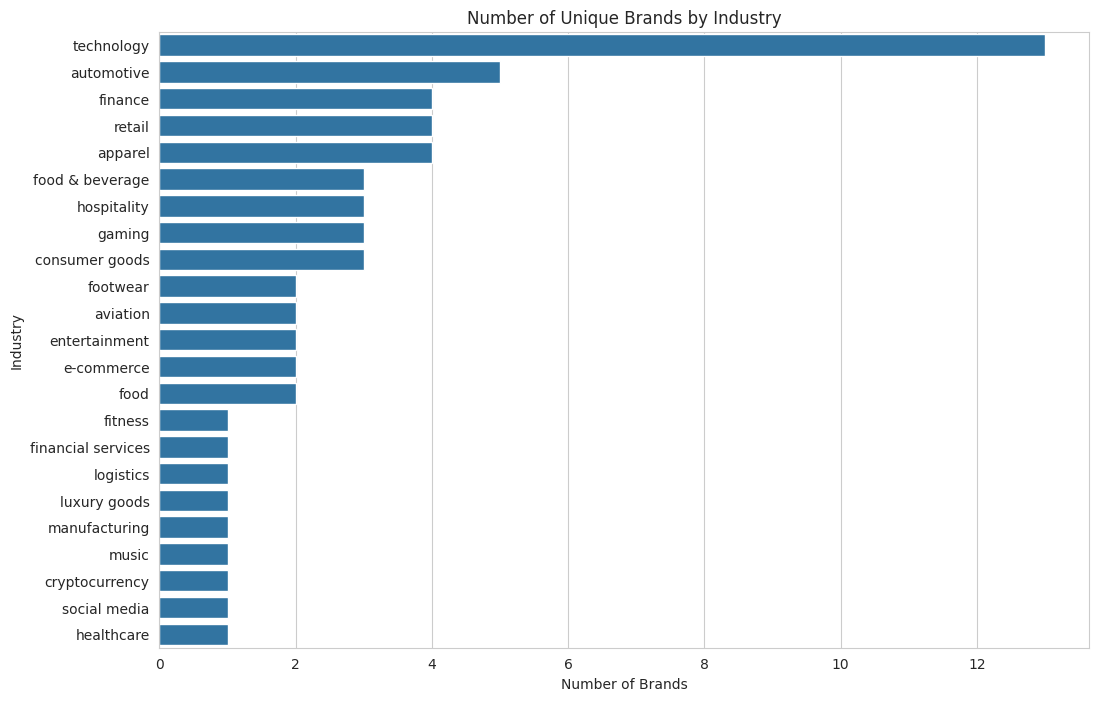

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Counting and ploting the number of unique brands in each industry
industry_brand_counts = df.groupby('Industry_Tag')['Brand_Name'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_brand_counts.values, y=industry_brand_counts.index)
plt.title('Number of Unique Brands by Industry')
plt.xlabel('Number of Brands')
plt.ylabel('Industry')
plt.show()

Ploting average closing price of industries in decreasing order

<ipython-input-58-b0123f418b63>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=industry_avg.values, y=industry_avg.index, palette=palette)


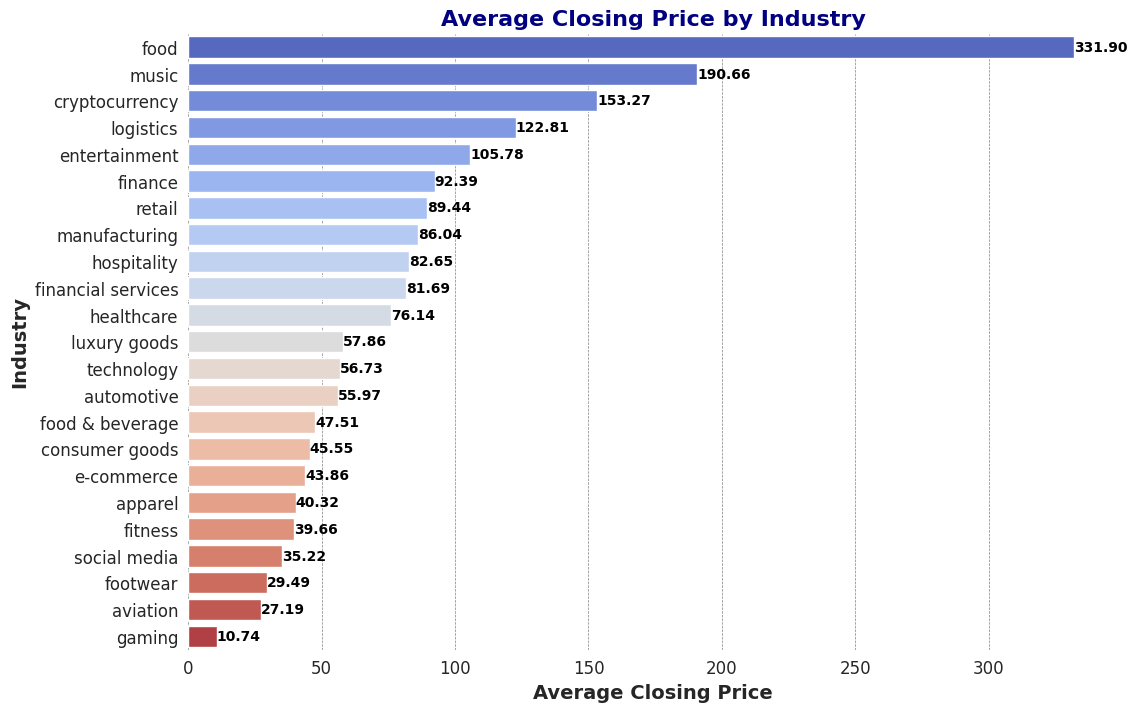

In [58]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
industry_avg = df.groupby('Industry_Tag')['Close'].mean().sort_values(ascending=False)
palette = sns.color_palette("coolwarm", len(industry_avg))

# Creating the barplot
ax = sns.barplot(x=industry_avg.values, y=industry_avg.index, palette=palette)
plt.title('Average Closing Price by Industry', fontsize=16, weight='bold', color='navy')
plt.xlabel('Average Closing Price', fontsize=14, weight='bold')
plt.ylabel('Industry', fontsize=14, weight='bold')

# Adding value labels to each bar
for index, value in enumerate(industry_avg.values):
    ax.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10, weight='bold')

# Customizing grid, spines, and fonts
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look

# Show plot
plt.show()


Ploting the share of each brand in the average closing price (FoodIndustry)

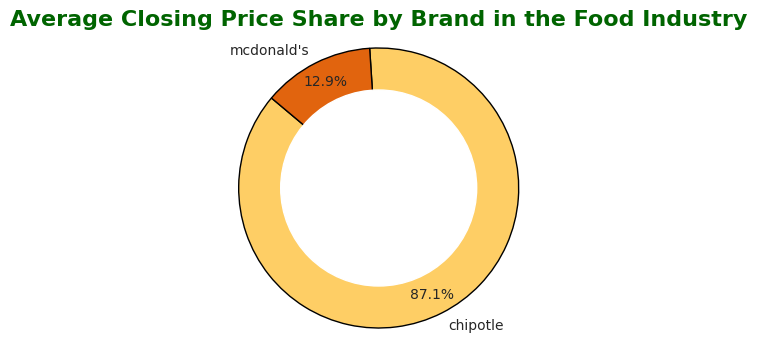

In [59]:
# Filter the dataset to include only the 'food' industry
food_data = df[df['Industry_Tag'] == 'food']

# Calculate the average closing price for each brand in the food industry
food_avg_closing = food_data.groupby('Brand_Name')['Close'].mean().sort_values(ascending=False)

# Plotting the average closing price of each brand in the food industry as a pie chart
plt.figure(figsize=(6, 4))

# Pie chart with additional styling
plt.pie(food_avg_closing, labels=food_avg_closing.index,
        autopct='%1.1f%%', startangle=140, pctdistance=0.85,
        wedgeprops={'edgecolor': 'black'},
        colors=sns.color_palette("YlOrBr", len(food_avg_closing)))

# Draw a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and other details
plt.title('Average Closing Price Share by Brand in the Food Industry', fontsize=16, weight='bold', color='darkgreen')
plt.axis('equal')  # Ensures the pie chart is circular

plt.show()


Ploting the share of each brand in the average closing price (tech Industry)

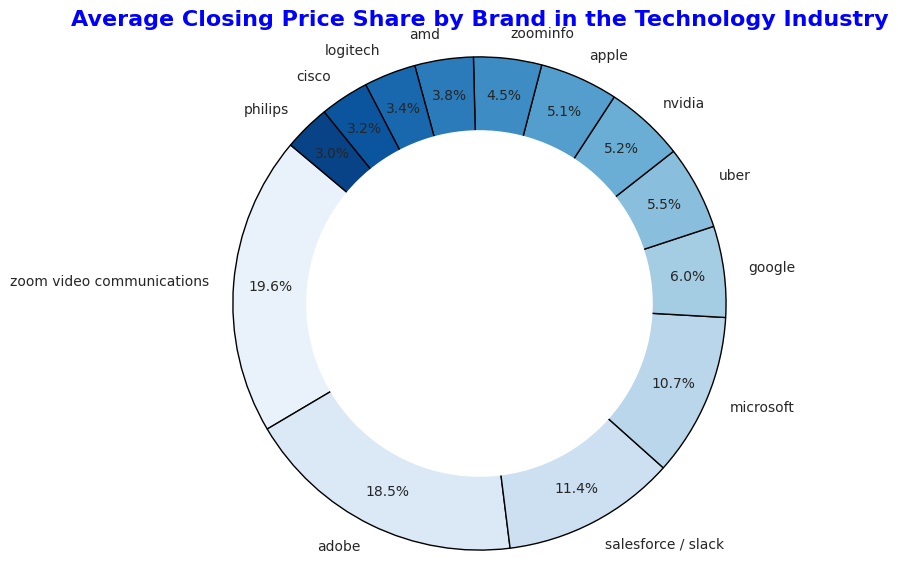

In [60]:
# Filter the dataset to include only the 'technology' industry
technology_data = df[df['Industry_Tag'] == 'technology']

# Calculate the average closing price for each brand in the technology industry
tech_avg_closing = technology_data.groupby('Brand_Name')['Close'].mean().sort_values(ascending=False)

# Plotting the average closing price of each brand in the technology industry as a donut-style pie chart
plt.figure(figsize=(7, 7))

# Pie chart with additional styling
plt.pie(tech_avg_closing, labels=tech_avg_closing.index,
        autopct='%1.1f%%', startangle=140, pctdistance=0.85,
        wedgeprops={'edgecolor': 'black'},
        colors=sns.color_palette("Blues", len(tech_avg_closing)))

# Draw a white circle in the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title and other details
plt.title('Average Closing Price Share by Brand in the Technology Industry', fontsize=16, weight='bold', color='blue')
plt.axis('equal')  # Ensures the pie chart is circular

plt.show()


 Ploting of the closing price of any brand from 2020 to 2024

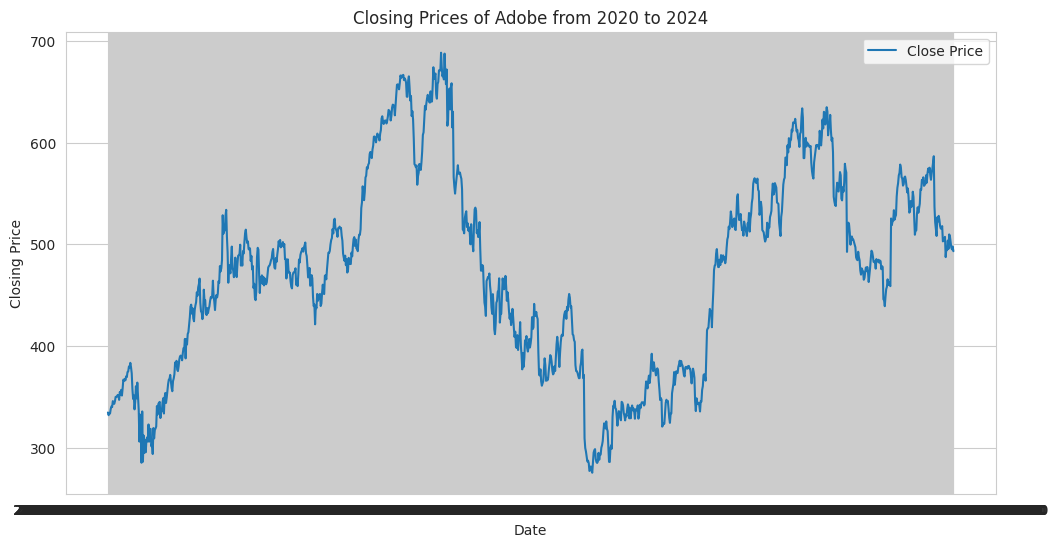

In [61]:
# Filter data for Chipotle and set date range
brand_name = 'adobe'
df_brand = df[(df['Brand_Name'] == brand_name) & (df['Date'] >= '2020-01-01') & (df['Date'] <= '2024-12-31')]

# Ensure data is sorted by date for accurate plotting
df_brand = df_brand.sort_values('Date')

# Plot the closing price over time for 2020-2024
plt.figure(figsize=(12, 6))
plt.plot(df_brand['Date'], df_brand['Close'], label='Close Price')
plt.title(f'Closing Prices of {brand_name.capitalize()} from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


Ploting the contrast of moving average of 7 days and average closing price of a brand

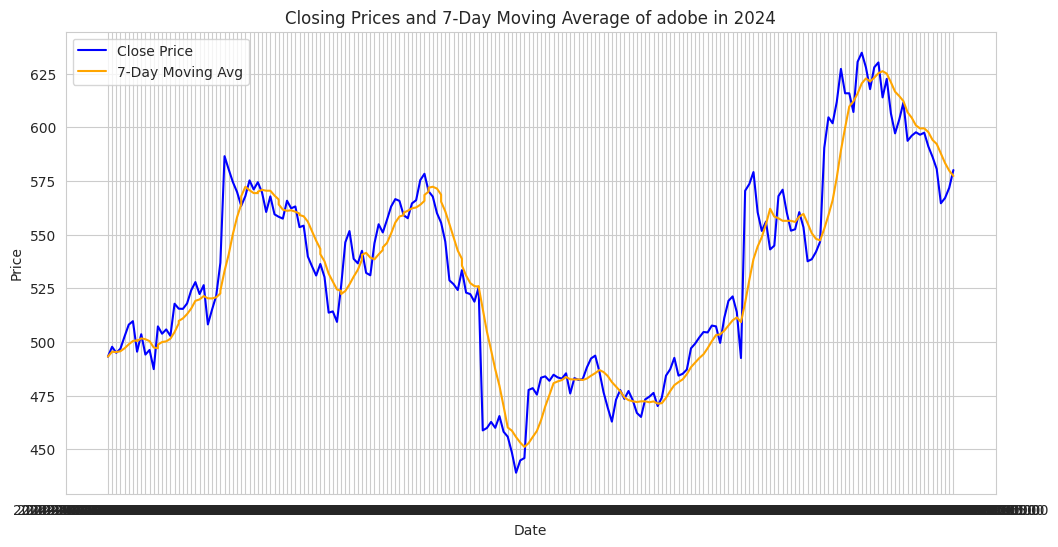

In [62]:
# Filter data for the year 2024
df_2024 = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-12-31')].copy()

# Calculate 7-day moving average of the closing price for each brand
df_2024['7-Day Moving Avg'] = df_2024.groupby('Brand_Name')['Close'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Plotting the moving average for a specific brand
brand_name = 'adobe'
df_brand = df_2024[df_2024['Brand_Name'] == brand_name]

plt.figure(figsize=(12, 6))
plt.plot(df_brand['Date'], df_brand['Close'], label='Close Price', color='blue')
plt.plot(df_brand['Date'], df_brand['7-Day Moving Avg'], label='7-Day Moving Avg', color='orange')
plt.title(f'Closing Prices and 7-Day Moving Average of {brand_name} in 2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Ploting moving average of top 10 brands to get the most reliable  brand and industry

Brands in Top 10 / Total Number of Brands in Each Industry:
Industry_Tag
entertainment     1/2
finance           2/4
food              2/2
music             1/1
retail            2/4
technology       2/13
dtype: object


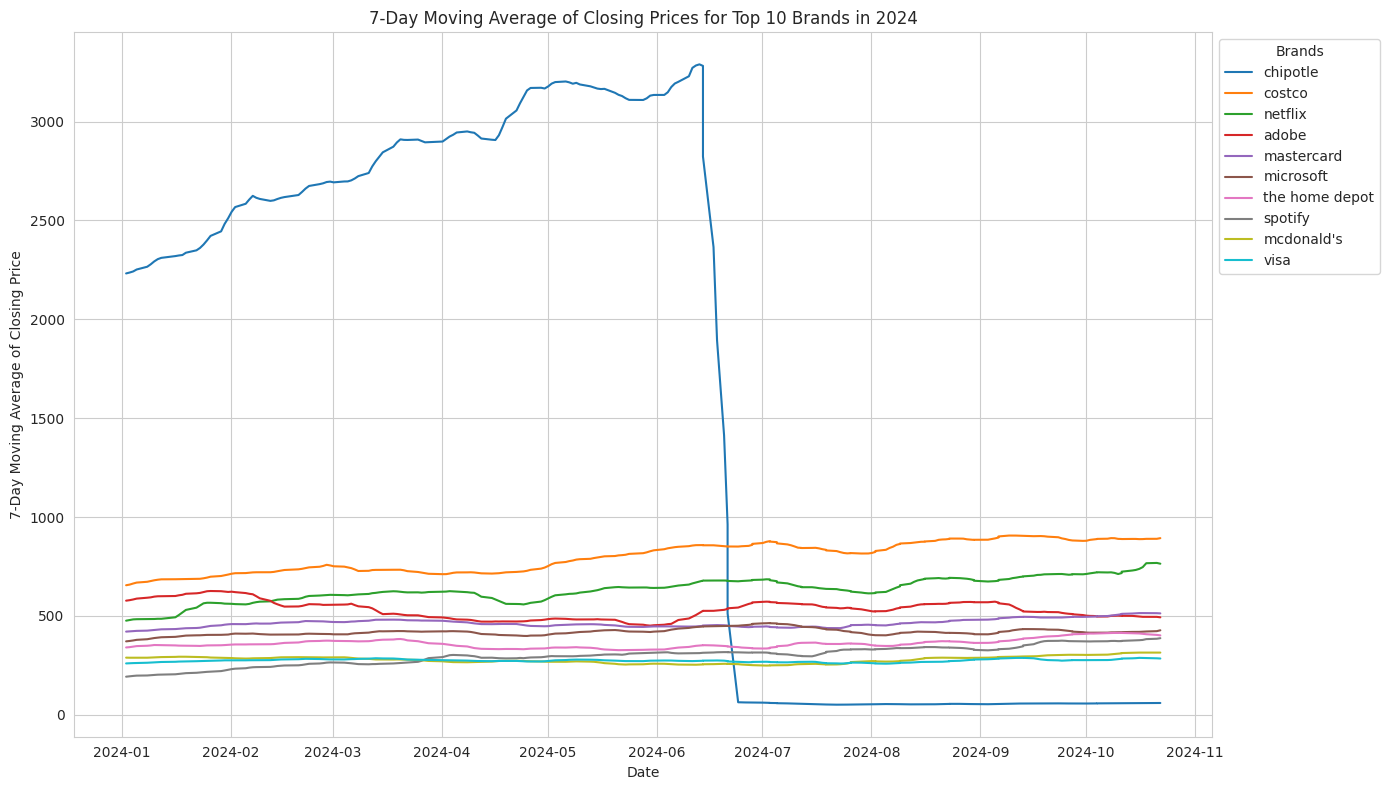

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the Date column is in datetime format and filter for 2024
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Date'] = df['Date'].dt.tz_localize(None)
df_2024 = df[df['Date'].dt.year == 2024]

# Calculate the average closing price for each brand over 2024 and select the top 10 brands
top_10_brands = df_2024.groupby('Brand_Name')['Close'].mean().nlargest(10).index

# Filter data for the top 10 brands and make a copy to avoid SettingWithCopyWarning
df_top_10 = df_2024[df_2024['Brand_Name'].isin(top_10_brands)].copy()

# Calculate the 7-day moving average for each brand
df_top_10['7-Day Moving Avg'] = df_top_10.groupby('Brand_Name')['Close'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# Calculate the number of unique brands in the top 10 per industry
top_10_industry_counts = df_top_10[['Brand_Name', 'Industry_Tag']].drop_duplicates().groupby('Industry_Tag').size()

# Calculate the total number of unique brands per industry
total_industry_counts = df[['Brand_Name', 'Industry_Tag']].drop_duplicates().groupby('Industry_Tag').size()

# Combine the counts to show the ratio of top 10 brands to total brands in each industry
industry_ratios = (top_10_industry_counts / total_industry_counts).fillna(0)
industry_ratio_formatted = top_10_industry_counts.astype(str) + "/" + total_industry_counts.astype(str)

# Filter to only show industries with at least one top 10 brand
industry_ratio_formatted = industry_ratio_formatted.dropna()

print("Brands in Top 10 / Total Number of Brands in Each Industry:")
print(industry_ratio_formatted)

# Plot the 7-day moving average for each of the top 10 brands
plt.figure(figsize=(14, 8))

for brand in top_10_brands:
    brand_data = df_top_10[df_top_10['Brand_Name'] == brand]
    plt.plot(brand_data['Date'], brand_data['7-Day Moving Avg'], label=brand)

# Customize the plot
plt.title('7-Day Moving Average of Closing Prices for Top 10 Brands in 2024')
plt.xlabel('Date')
plt.ylabel('7-Day Moving Average of Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Brands")
plt.grid(True)
plt.tight_layout()
plt.show()


Sentimental analysis of finance news headlines from Yahoo website

In [64]:
from bs4 import BeautifulSoup
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER data
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
url = "https://finance.yahoo.com/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Extract headlines (adjust selector as needed)
headlines = [headline.get_text() for headline in soup.find_all('h3')]

# Perform sentiment analysis
for headline in headlines:
    sentiment_score = sia.polarity_scores(headline)
    sentiment = 'Positive' if sentiment_score['compound'] > 0 else 'Negative'
    print(f"Headline: {headline}")
    print(f"Sentiment: {sentiment}")
    print("-" * 50)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Headline:  News
Sentiment: Negative
--------------------------------------------------
Headline:  Life
Sentiment: Negative
--------------------------------------------------
Headline:  Entertainment
Sentiment: Positive
--------------------------------------------------
Headline:   Finance
Sentiment: Negative
--------------------------------------------------
Headline:  Sports
Sentiment: Negative
--------------------------------------------------
Headline: New on Yahoo
Sentiment: Negative
--------------------------------------------------
Headline: Buffett's Berkshire is being packaged into a leveraged ETF
Sentiment: Negative
--------------------------------------------------
Headline: Trump says Musk will lead new 'government efficiency' group
Sentiment: Positive
--------------------------------------------------
Headline: Bitcoin rally cools after 30% jump since Trump win
Sentiment: Positive
--------------------------------------------------
Headline: Pre-owned EVs are about to flood 